In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [2]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [4]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [5]:
!pip install jamo

In [6]:
import pandas as pd
import numpy as np
import re

In [7]:
mecab = Mecab()
okt = Okt()

In [8]:
data = pd.read_csv('/content/drive/MyDrive/1-8월 뉴스.csv')

In [9]:
def sub_special(s): ## 특수문자, 숫자, 영어, 중복공백 제거
  rs = re.sub(r'[^가-힣]',' ',s)
  rr = re.sub(' +', '', rs)
  return rr

In [44]:
sample = data.copy()
sample['cleansed'] = np.NaN
sample.cleansed = sample.text.apply(sub_special)
sample['mecab'] = sample.cleansed.apply(mecab.nouns)
# sample['okt'] = sample.cleansed.apply(okt.morphs)

In [11]:
# with open("./stopwords.txt", 'r', encoding='utf-8') as f:
  ttt = f.readlines()

In [12]:
def sub_special_token(s):
  rs = re.sub(r'[^가-힣]',' ',s)
  return rs

In [ ]:
ttt

In [14]:
tmp = []
for i in ttt:
  tmp.append(sub_special(i))

In [15]:
stopwords = tmp

In [ ]:
stopwords

In [30]:
def word_cleansing(data): 
  for i in range(len(data)): #불용어 제거
    result = []
    for w in data.mecab[i]:
      if w not in stopwords:
        result.append(w)
    data.mecab[i] = result

In [49]:
word_cleansing(sample)

In [ ]:
sample.mecab

In [158]:
sample.cleansed

0        [이, 땅, 에서, 비정규직, 이, 라는, 표현, 이, 광범위, 하, 게, 쓰인, ...
1        [일자리, 보다, 일거리, 노동, 의, 미래, 를, 모두, 알, 수, 는, 없, 다...
2        [일자리, 보다, 일거리, 학습, 데이터, 가공, 기업, 크, 라, 우드, 웍스, ...
3        [새로, 태어나, 는, 아이, 들, 은, 줄어들, 고, 어르신, 들, 은, 계속, ...
4        [새천년, 의, 시작, 과, 함께, 세상, 에, 나온, 년, 대생, 들, 이, 어느...
                               ...                        
29036    [직장, 인, 씨, 는, 수도권, 사회적 거리두기, 단계, 를, 시행, 하, 는, ...
29037    [일, 시, 부터, 서울, 전역, 에, 강화, 된, 사회적 거리두기, 단계, 가, ...
29038    [수도, 권, 의, 사회적 거리두기, 단계, 시행, 기간, 에, 맞춰, 서울, 시내...
29039    [일, 부터, 일, 째, 무기, 한, 집단, 휴진, 을, 이, 어, 가, 고, 있,...
29040    [전공의, 들, 의, 집단휴업, 을, 둘러싼, 의, 정, 갈등, 이, 고조, 되, ...
Name: cleansed, Length: 29041, dtype: object

In [18]:
cd /tmp/mecab-ko-dic-2.1.1-20180720/

/tmp/mecab-ko-dic-2.1.1-20180720


In [19]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f: 
  file_data = f.readlines()

In [20]:
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n', '구글,,,,NNP,*,T,구글,*,*,*,*,*\n']

In [21]:
dic_list = []

In [22]:
from jamo import h2j, j2hcj 
def get_jongsung_TF(sample_text):
  sample_text_list = list(sample_text)
  last_word = sample_text_list[-1]
  last_word_jamo_list = list(j2hcj(h2j(last_word)))
  last_jamo = last_word_jamo_list[-1]
  jongsung_TF = "T"
  if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']:
    jongsung_TF = "F"
  return jongsung_TF


In [23]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f:
  file_data = f.readlines()
  word_list = ['집단휴업', '집단휴진', '사회적 거리두기', '수도권', '거리두기', '직장인']
  for word in word_list:
    jongsung_TF = get_jongsung_TF(word)
    line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word)
    file_data.append(line)

In [24]:
with open("./user-dic/nnp.csv", 'w', encoding='utf-8') as f:
  for line in file_data:
    f.write(line)

In [25]:
# word_list = ['집단휴업', '집단휴진', '사회적 거리두기'] 
# for word in word_list:
#   jongsung_TF = get_jongsung_TF(word)
#   line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word)
#   dic_list.append(line)
# tmp = '수도권,,,0,NNP,*,T,수도권,*,*,*,*,*\n'
# dic_list.append(tmp)

In [26]:
# dic_list

In [27]:
# with open("./user-dic/nnp.csv", 'w', encoding='utf-8') as f:
#   for line in dic_list:
#     f.write(line)

In [28]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f:
  file_new = f.readlines()
file_new

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '집단휴업,,,0,NNP,*,T,집단휴업,*,*,*,*,*\n',
 '집단휴진,,,0,NNP,*,T,집단휴진,*,*,*,*,*\n',
 '사회적 거리두기,,,0,NNP,*,F,사회적 거리두기,*,*,*,*,*\n',
 '수도권,,,0,NNP,*,T,수도권,*,*,*,*,*\n']

In [ ]:
!bash ./tools/add-userdic.sh
!make install

In [31]:
mecab = Mecab()
sample['mecab'] = sample.cleansed.apply(mecab.morphs)

In [99]:
stop_words = '의 가 이 은 들 기자 는 좀 잘 에 을 를 부터 이 에서 씨 인 년 대생 일 다음 달 가운데 쓰 여년 겁니다 무엇'
stop_words=stop_words.split(' ')
stop = stop_words + stopwords
stop = pd.Series(stop)
stopwords = stop.unique().tolist()

In [100]:
word_cleansing(sample)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [53]:
sample.mecab

0        [땅, 비정규직, 표현, 광범위, 정부, 신규, 일자리, 창출, 비정규직, 정규직,...
1        [일자리, 일거리, 노동, 미래, 현실, 변화, 면면, 준비, 짐작, 경향신문, 노...
2        [일자리, 일거리, 학습, 데이터, 공기업, 우드, 웍스, 교육장, 참관, 소화전,...
3        [아이, 어르신, 나이, 다년, 새해, 정부, 정책, 발표, 혜택, 경향신문, 저출...
4        [새천년, 시작, 세상, 변화, 대가, 전후, 밀레니엄, 베이비, 세대, 분류, 가...
                               ...                        
29036    [직장, 수도, 거리, 두기, 단계, 시행, 일간, 무급, 휴가, 사용, 통보, 회...
29037    [일시, 서울, 전역, 강화, 거리, 두기, 단계, 시행, 전문가, 기대, 만큼, ...
29038    [수도, 거리, 두기, 단계, 시행, 기간, 서울, 시내버스, 야간, 운행, 감축,...
29039    [집단휴진, 전공, 인턴, 레지던트, 정부, 갈등, 벼랑, 끝, 전공, 협의회, 비...
29040    [전공의, 집단휴업, 의정, 갈등, 고조, 의료, 현장, 의대, 교수, 후배, 의사...
Name: mecab, Length: 29041, dtype: object

In [34]:
from gensim.models import Word2Vec

In [35]:
from sklearn.cluster import KMeans

In [36]:
def embedding(data):
    embedding_model = Word2Vec(data.mecab, vector_size=200, window = 2, min_count=3, workers=4, epochs=100, sg=1)
    return embedding_model

In [37]:
def get_sentence_mean_vector(morphs):
    vector = []
    for i in morphs:
        try:
            vector.append(embedding_model.wv[i])
        except KeyError as e:
            pass
    try:
        return sum(vector)/len(vector)
    except IndexError as e:
        pass

In [104]:
def create_model(data):
    word_vectors = data['wv'].to_list() 
    num_clusters = 15

    # K means 를 정의하고 학습시킨다.
    kmeans_clustering = KMeans(n_clusters=num_clusters, init='k-means++', n_init=25, max_iter = 600, random_state=0)
    idx = kmeans_clustering.fit_predict( word_vectors )
    data['category'] = idx

In [101]:
embedding_model = Word2Vec(sample.mecab, size=50, window = 2, min_count=3, workers=4, iter=10, sg=1, seed=0)

In [102]:
sample['wv'] = sample['mecab'].map(get_sentence_mean_vector)

In [105]:
create_model(sample)

In [75]:
import matplotlib.pyplot as plt

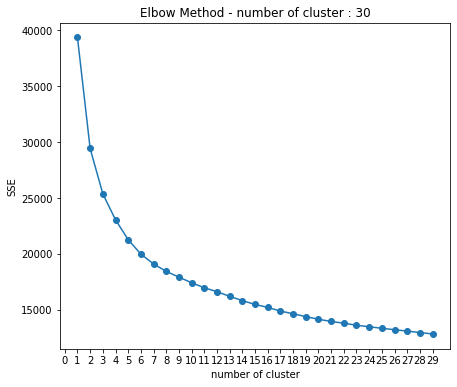

In [103]:
def elbow(data, Clusters):

    word_vectors = data['wv'].to_list()
    sse = []
    for i in range(1,Clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++',n_init=25, max_iter = 600, random_state=0)
        kmeans.fit(word_vectors)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(7,6))
    plt.plot(range(1,Clusters), sse, marker='o')
    plt.xlabel('number of cluster')
    plt.xticks(np.arange(0,Clusters,1))
    plt.ylabel('SSE')
    plt.title('Elbow Method - number of cluster : '+str(Clusters))
    plt.show()
elbow(sample, 30)


In [ ]:
print(sse)

In [110]:
sample.date.value_counts()

2020-06-16    170
2020-08-21    169
2020-07-01    169
2020-05-12    168
2020-04-16    165
             ... 
2020-03-08      1
2020-04-26      1
2020-08-30      1
2020-05-10      1
2020-01-27      1
Name: date, Length: 231, dtype: int64

In [142]:
aaa = sample['title'][sample['category'] == 12]

In [143]:
aaa

37                                   [포토] 갈등 녹이고… 솟아라 새 희망
44       공수처발 한파에 국회 올스톱 위기... 총리 인준·민생입법 어쩌나 [공수처법 통과 이후]
118                             文 “권력기관 개혁 계속… 대통령권한 다할 것”
146                    靑, 6일 비서관 인사 단행할 듯…윤건영 서울 구로을 출마 유력
156                      靑, 추미애 임명 수순… 野 ‘정세균 청문회’ 보이콧 움직임
                               ...                        
28997    [팔면봉] 與 선장 된 이낙연, 靑엔 할 말 하고 野와 협치하고 코로나 이겨 정권 ...
29006                                 파업 유지案, 전공의 1차투표땐 부결
29012          [outlook] 일본 혐한여론 강해, 아베 후임 누가 돼도 한·일훈풍 힘들다
29018                        모든 중재안 거부, 환자 곁에 오지 않겠다는 전공의들
29027               이낙연 “곧 재난지원금 논의 정리”…상임위 재배분 ‘협치 카드’ 검토
Name: title, Length: 2532, dtype: object

In [86]:
cd /content/drive/MyDrive/textrank-master

/content/drive/MyDrive/textrank-master


In [87]:
import textrank

In [89]:
from textrank import KeywordSummarizer
def token(docs):
    return docs

In [119]:
keyword_extractor = KeywordSummarizer(tokenize = token,
    min_count=3,
    window=8,                     # cooccurrence within a sentence
    min_cooccurrence=2,
    vocab_to_idx=None,             # you can specify vocabulary to build word graph
    df=0.85,                       # PageRank damping factor
    max_iter=30,                   # PageRank maximum iteration
    verbose=False)

keywords1 = keyword_extractor.summarize(aaa, topk=20)

In [127]:
for i in range(0,15):
  num = i
  aaa = sample['mecab'][sample['category'] == num]
  globals()['keywords_{}'.format(i)] = keyword_extractor.summarize(aaa, topk=20)

In [115]:
# 0 = 코로나
# 1 = 선거/정치 
# 2 = 사고/재해
# 3 = 위안부/여성피해
# 4 = 제외
# 5 = 코로나/정부지원
# 6 = 제외
# 7 = 코로나방역
# 8 = 국내외정세
# 9 = 한국영화/기생충
# 10 = 코로나확진
# 11 = 코로나경제
# 12 = 정치
# 13 = 검찰/대검
# 14 = 부동산

In [147]:
category_list = ['코로나', '선거/정치', '사고/재해', '위안부/여성피해', '제외', '코로나/정부지원', '제외', '코로나방역','북한/국내외정세', '한국영화/기생충', '코로나확진', '코로나경제','정치','검찰/대검','부동산']

In [153]:
tmp = []
for i in range(0,15):
  for x in range(len(sample)):
    if sample['category'][x] == i:
      tmp.append(category_list[i])

In [157]:
tmp = []
for x in range(len(sample)):
  for i in range(0,15):
    if sample['category'][x] == i:
      tmp.append(category_list[i])

In [159]:
sample.category_txt = tmp

In [162]:
sample.category_txt.value_counts()

선거/정치       3381
북한/국내외정세    3146
코로나확진       2965
정치          2532
코로나/정부지원    2504
코로나방역       2341
위안부/여성피해    2296
코로나         1889
코로나경제       1782
한국영화/기생충    1691
검찰/대검       1631
부동산         1574
사고/재해        809
제외           500
Name: category_txt, dtype: int64

In [163]:
sample.category.value_counts()

1     3381
8     3146
10    2965
12    2532
5     2504
7     2341
3     2296
0     1889
11    1782
9     1691
13    1631
14    1574
2      809
6      370
4      130
Name: category, dtype: int64